# Side effects of the DataFrame

In [1]:
import pandas as pd

## Data "grammars"

Different domains/fields of research can define their own standardized schemas or "grammars".

### Declarative Plotting

Do you ever wonder why you (probably) like R's plotting libraries over Python?

The most noteable is the ["Grammar of Graphics"](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448) (`ggplot` anyone?).

In [19]:
import altair as alt
from vega_datasets import data as datasets

data = datasets.iowa_electricity()
data.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


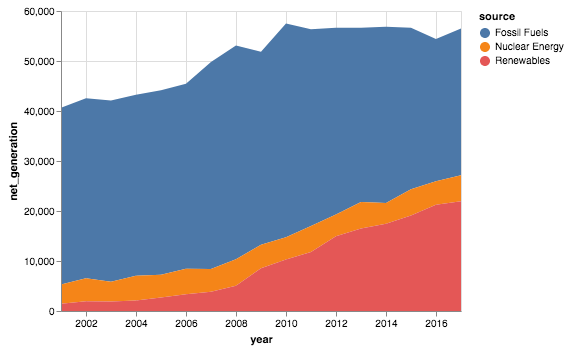

In [25]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

By the way, this gets insane!

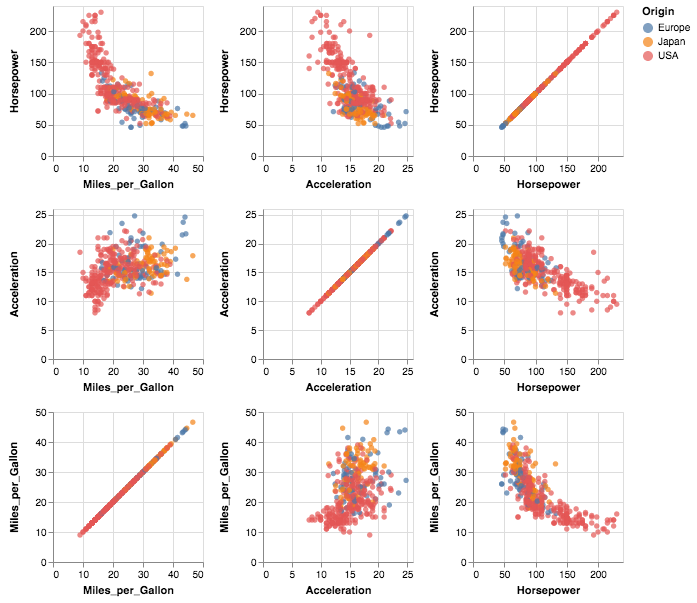

In [27]:
data = datasets.cars()

alt.Chart(data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Origin:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Horsepower', 'Acceleration', 'Miles_per_Gallon'],
    column=['Miles_per_Gallon', 'Acceleration', 'Horsepower']
).interactive()

They've even created a grammar of interactivity.

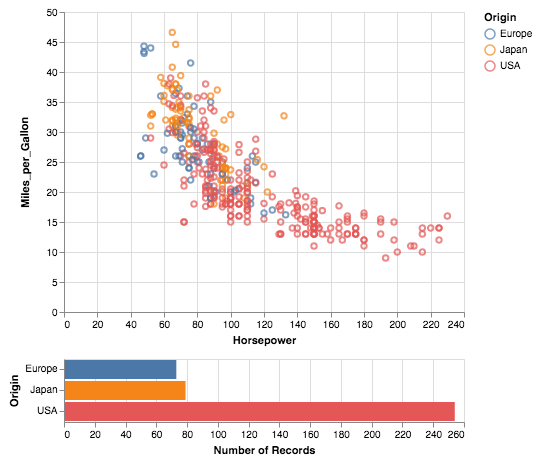

In [28]:
data = datasets.cars()

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=data)

## Common data structure

The open-source community can contribute "read" and "write" methods for various data formats to a central memory format. The DataFrame becomes the bridge between all formats. 

In [3]:
[item for item in dir(pd) if item[:4] == "read"]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [7]:
[item for item in dir(pd.DataFrame) if item[:2] == "to"]

['to_clipboard',
 'to_csv',
 'to_dense',
 'to_dict',
 'to_excel',
 'to_feather',
 'to_gbq',
 'to_hdf',
 'to_html',
 'to_json',
 'to_latex',
 'to_msgpack',
 'to_numpy',
 'to_panel',
 'to_parquet',
 'to_period',
 'to_pickle',
 'to_records',
 'to_sparse',
 'to_sql',
 'to_stata',
 'to_string',
 'to_timestamp',
 'to_xarray']

## Language agnostic

In [8]:
from IPython.display import IFrame

In [10]:
IFrame("https://arrow.apache.org", width=800, height=900)